
====== CV Skills Matcher ======

Loading job data from: C:\Users\yasse\Downloads\job_title_career_level_governorate_top_skills.csv

Available Job Titles:
1.  SOC
2. .NET Developer
3. 5G Network Engineer
4. AI Engineer
5. AI Specialist
6. AWS Developer
7. AWS Engineer
8. Analytics Engineer
9. Android Developer
10. Angular Developer
11. Artificial Intelligence Engineer
12. Azure Developer
13. Azure Engineer
14. BIDL
15. Big Data Engineer
16. Business Intelligence Analyst
17. Cloud Engineer
18. Cloud Solutions Architect
19. Compliance Specialist
20. Computer Vision Engineer
21. Cybersecurity Engineer
22. Dart Developer
23. Data Analyst
24. Data Architect
25. Data Engineer
26. Data Modeler
27. Data Scientist
28. Data Visualization Developer
29. Data Warehouse Developer
30. Database Administrator
31. Database Administrator (DBA)
32. Deep Learning Engineer
33. Design Systems Engineer
34. DevOps
35. DevOps Engineer
36. Docker Developer
37. ETL Developer
38. Embedded Systems Engineer
39. Fast


Select a job title (enter number):  23



Available Governorates:
1. Al Ain
2. Alexandria
3. Baghdad
4. Beheira
5. Cairo
6. Dakahlia
7. Damascus
8. Damietta
9. Dubai
10. Fayoum
11. Gharbia
12. Giza
13. Ismailia
14. Jeddah
15. Makkah
16. Matruh
17. Monufya
18. Qalubia
19. Red Sea
20. Riyadh
21. Sharjah
22. Sharqia
23. South Sinai
24. Suez



Select a governorate (enter number):  2



Available Professional Levels:
1. fresh
2. junior
3. manager
4. mid
5. senior



Select a professional level (enter number):  1

Enter the path to your CV file (PDF, DOCX, or TXT):  C:\\Users\\yasse\\Desktop\\Mennatullah-Yasser-Nabile-cv.pdf



Processing CV...
CV processed successfully! Found 42 skills.

Detected Skills (42):
• administrative    • development       • management system 
• ai                • digital           • microsoft         
• analysis          • dynamic           • natural language processing
• arabic            • engineer          • power             
• camp              • english           • production        
• com               • face              • programming       
• communication     • flask             • query             
• computer          • git               • recruitment       
• data              • health            • research          
• data analysis     • hospital          • science           
• data science      • learning          • support           
• database          • machine           • tableau           
• deep              • machine learning  • telecommunication 
• deep learning     • management        • training          

===== Match Analysis: Data Analyst =====
Governorat


Do you want to display charts in GUI windows? (y/n):  y


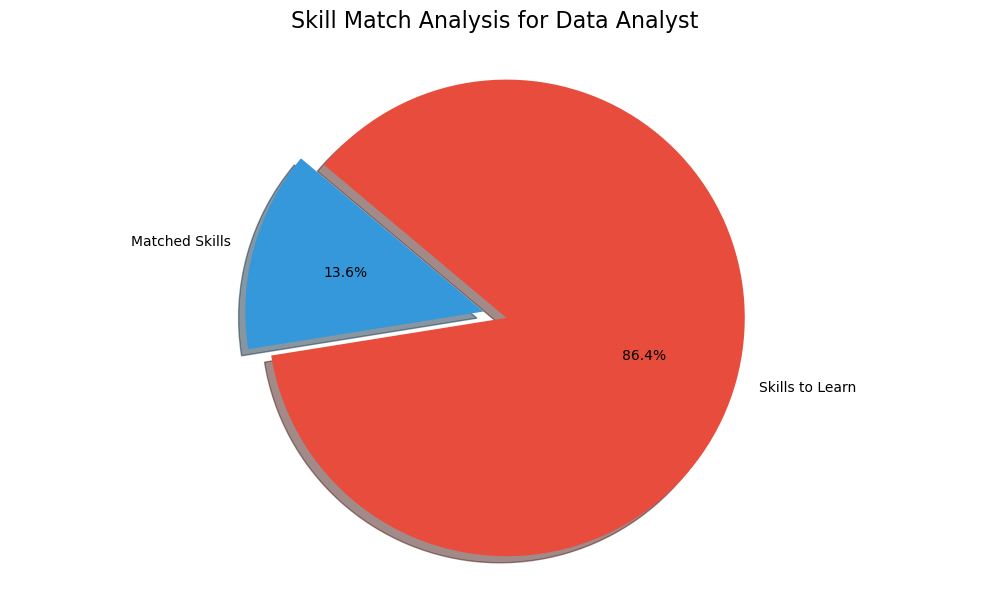

In [2]:
import pandas as pd
import PyPDF2
import docx
import re
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

# Download NLTK resources if needed
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Function to read Excel data
def load_data(file_path):
    try:
        # Check file extension
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        else:
            df = pd.read_excel(file_path)
        return df, None
    except Exception as e:
        return pd.DataFrame(), f"Error loading data: {e}"

# Function to extract text from CV
def extract_text_from_cv(file_path):
    text = ""
    file_extension = file_path.split('.')[-1].lower()
    
    try:
        if file_extension == 'pdf':
            with open(file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page in pdf_reader.pages:
                    text += page.extract_text() or ""
                
        elif file_extension == 'docx':
            doc = docx.Document(file_path)
            for para in doc.paragraphs:
                text += para.text + "\n"
                
        elif file_extension == 'txt':
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
        else:
            return None, f"Unsupported file format: {file_extension}"
            
        return text, None
    except Exception as e:
        return None, f"Error extracting text from CV: {e}"

# Create a list of non-skill terms to exclude
def get_exclusion_list():
    # Common stop words
    stop_words = set(stopwords.words('english'))
    
    # Add locations and other non-skill terms
    locations = [
        "alexandria", "cairo", "giza", "aswan", "luxor", "sharm el sheikh", 
        "hurghada", "mansoura", "tanta", "assiut", "port said", "suez", 
        "ismailia", "new cairo", "october", "helwan", "maadi", "zamalek"
    ]
    
    # Add common CV terms that are not skills
    other_terms = [
        "resume", "cv", "curriculum", "vitae", "address", "email", "phone", 
        "tel", "education", "work", "experience", "reference", "references",
        "student", "graduate", "university", "college", "school", "gpa", "grade",
        "contact", "profile", "objective", "summary", "year", "month", "day",
        "january", "february", "march", "april", "may", "june", "july", "august",
        "september", "october", "november", "december", "date", "birth", "gender",
        "nationality", "address", "city", "country", "region", "governorate",
        "bachelor", "master", "phd", "degree", "certificate", "certification"
    ]
    
    # Add single letters and numbers that might get picked up
    single_chars = [chr(i) for i in range(97, 123)]  # a to z
    numbers = [str(i) for i in range(10)]  # 0 to 9
    
    # Combine all exclusions
    exclusions = list(stop_words) + locations + other_terms + single_chars + numbers
    
    return exclusions

# Function to extract skills from text
def extract_skills(text, all_skills_list):
    if not text:
        return []
    
    # Get exclusion list
    exclusions = get_exclusion_list()
    
    # Convert text to lowercase for case-insensitive matching
    text_lower = text.lower()
    
    # Extract skills that appear in the text and are in the skills list
    found_skills = []
    for skill in all_skills_list:
        skill_lower = skill.lower()
        # Skip single characters, stop words, and other excluded terms
        if skill_lower in exclusions or len(skill_lower) <= 1:
            continue
            
        if re.search(r'\b' + re.escape(skill_lower) + r'\b', text_lower):
            # Only add if it's not already in the list (case insensitive)
            if not any(s.lower() == skill_lower for s in found_skills):
                found_skills.append(skill)  # Add with original casing
    
    return found_skills

# Extract all unique skills from the dataset
def get_all_skills(df):
    all_skills = []
    for skills_text in df['skills']:
        if pd.notna(skills_text):  # Check if the cell is not NaN
            skills = [skill.strip() for skill in str(skills_text).split(',')]
            all_skills.extend(skills)
    
    # Clean the skills list - remove empty strings and duplicates
    cleaned_skills = []
    exclusions = get_exclusion_list()
    
    for skill in all_skills:
        skill_lower = skill.lower()
        # Skip excluded terms, empty strings, and very short skills
        if skill and skill_lower not in exclusions and len(skill_lower) > 1:
            # Only add if not already in the list (case insensitive)
            if not any(s.lower() == skill_lower for s in cleaned_skills):
                cleaned_skills.append(skill)
                
    return cleaned_skills

# Function to analyze skills
def analyze_skills(user_skills, job_skills):
    # Convert to lowercase for comparison
    user_skills_lower = [skill.lower() for skill in user_skills]
    job_skills_lower = [skill.lower() for skill in job_skills]
    
    matching_skills = [skill for skill in job_skills if skill.lower() in user_skills_lower]
    missing_skills = [skill for skill in job_skills if skill.lower() not in user_skills_lower]
    
    return matching_skills, missing_skills

# Function to visualize skill matches with ASCII for terminals without GUI
def visualize_skill_matches_terminal(job_title, matched_skills, missing_skills):
    """Visualize skill matches for the job with ASCII in the terminal"""
    total_skills = len(matched_skills) + len(missing_skills)
    matched_percent = (len(matched_skills) / total_skills * 100) if total_skills > 0 else 0
    missing_percent = (len(missing_skills) / total_skills * 100) if total_skills > 0 else 0
    
    print("\n" + "="*80)
    print(f"SKILL MATCH ANALYSIS FOR {job_title}".center(80))
    print("="*80)
    
    # Display statistics
    print(f"Total Skills Required: {total_skills}")
    print(f"Matched Skills: {len(matched_skills)} ({matched_percent:.1f}%)")
    print(f"Missing Skills: {len(missing_skills)} ({missing_percent:.1f}%)")
    
    # Create visual representation
    print("\nSkill Match Visualization:")
    
    # Chart width
    width = 60
    matched_width = int((matched_percent / 100) * width)
    missing_width = width - matched_width
    
    # Draw the chart
    print("┌" + "─" * width + "┐")
    print("│" + "█" * matched_width + "░" * missing_width + "│")
    print("└" + "─" * width + "┘")
    print(f"   █ Matched Skills ({matched_percent:.1f}%)   ░ Skills to Learn ({missing_percent:.1f}%)")
    
    print("="*80)

# Function to visualize skill matches (GUI version)
def visualize_skill_matches(job_title, matched_skills, missing_skills):
    # Create data for the pie chart
    labels = ['Matched Skills', 'Skills to Learn']
    sizes = [len(matched_skills), len(missing_skills)]
    colors = ['#3498db', '#e74c3c']
    explode = (0.1, 0)  # explode the matched skills slice
    
    plt.figure(figsize=(10, 6))
    plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140
    )
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Skill Match Analysis for {job_title}', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# Function to display detected skills from CV in a more organized way
def display_detected_skills(skills):
    if not skills:
        print("No recognizable skills found in your CV.")
        return
        
    print(f"\nDetected Skills ({len(skills)}):")
    # Group skills into multiple columns for better display
    col_width = 20
    num_cols = 3
    skills_sorted = sorted(skills)
    
    # Calculate rows needed
    rows = (len(skills_sorted) + num_cols - 1) // num_cols
    
    # Print in columns
    for i in range(rows):
        row = ""
        for j in range(num_cols):
            idx = i + j * rows
            if idx < len(skills_sorted):
                row += f"• {skills_sorted[idx]}".ljust(col_width)
        print(row)

# Main function
def main():
    print("\n====== CV Skills Matcher ======\n")
    
    # Set the data file path directly in the code
    data_file ="C:\\Users\\yasse\\Downloads\\job_title_career_level_governorate_top_skills.csv"
    print(f"Loading job data from: {data_file}")
    
    df, error = load_data(data_file)
    
    if error:
        print(f"Error: {error}")
        return
    
    if df.empty:
        print("Failed to load job data. Please check the file path.")
        return
    
    # Extract lists for selection
    job_titles = sorted(df['Job Title'].unique())
    governorates = sorted(df['Governorate'].unique())
    
    # Check column name for professional level
    level_column = 'professional level' if 'professional level' in df.columns else 'professional Level'
    professional_levels = sorted(df[level_column].unique())
    
    # Get all cleaned skills from dataset
    all_skills_list = get_all_skills(df)
    
    # Display available job titles
    print("\nAvailable Job Titles:")
    for i, job in enumerate(job_titles, 1):
        print(f"{i}. {job}")
    
    # Job selection
    job_choice = int(input("\nSelect a job title (enter number): "))
    if job_choice < 1 or job_choice > len(job_titles):
        print("Invalid job selection. Please try again.")
        return
    selected_job = job_titles[job_choice - 1]
    
    # Display available governorates
    print("\nAvailable Governorates:")
    for i, gov in enumerate(governorates, 1):
        print(f"{i}. {gov}")
    
    # Location selection
    gov_choice = int(input("\nSelect a governorate (enter number): "))
    if gov_choice < 1 or gov_choice > len(governorates):
        print("Invalid governorate selection. Defaulting to Cairo.")
        selected_governorate = "Cairo" if "Cairo" in governorates else governorates[0]
    else:
        selected_governorate = governorates[gov_choice - 1]
    
    # Display available professional levels
    print("\nAvailable Professional Levels:")
    for i, level in enumerate(professional_levels, 1):
        print(f"{i}. {level}")
    
    # Professional level selection
    level_choice = int(input("\nSelect a professional level (enter number): "))
    if level_choice < 1 or level_choice > len(professional_levels):
        print("Invalid professional level selection. Defaulting to Senior.")
        selected_level = "Senior" if "Senior" in professional_levels else professional_levels[0]
    else:
        selected_level = professional_levels[level_choice - 1]
    
    # CV upload
    cv_path = input("\nEnter the path to your CV file (PDF, DOCX, or TXT): ")
    if not os.path.exists(cv_path):
        print("CV file not found. Please check the path and try again.")
        return
    
    # Extract text from CV
    print("\nProcessing CV...")
    cv_text, error = extract_text_from_cv(cv_path)
    
    if error:
        print(f"Error: {error}")
        return
    
    if not cv_text:
        print("Failed to extract text from the CV. Please check the file and try again.")
        return
    
    # Extract skills from CV
    user_skills = extract_skills(cv_text, all_skills_list)
    
    if not user_skills:
        print("No recognizable skills found in your CV. Please ensure your CV includes relevant skills.")
        return
    
    print(f"CV processed successfully! Found {len(user_skills)} skills.")
    
    # Display found skills in an organized way
    display_detected_skills(user_skills)
    
    # Get selected job details
    # Filter by job title, governorate and professional level
    job_row = df[(df['Job Title'] == selected_job) & 
                 (df['Governorate'] == selected_governorate) & 
                 (df[level_column] == selected_level)]
    
    if job_row.empty:
        print(f"\nNo exact match found for {selected_job} in {selected_governorate} at {selected_level} level.")
        print("Using only job title for matching...")
        job_row = df[df['Job Title'] == selected_job]
        
        if job_row.empty:
            print(f"No data found for {selected_job}. Please try again.")
            return
    
    # Use the first matching row
    selected_job_idx = job_row.index[0]
    selected_job_skills_text = job_row.iloc[0]['skills']
    
    # Make sure skills are properly processed
    if pd.isna(selected_job_skills_text):
        selected_job_skills = []
    else:
        selected_job_skills = [skill.strip() for skill in str(selected_job_skills_text).split(',')]
        # Filter out non-skill items
        exclusions = get_exclusion_list()
        selected_job_skills = [skill for skill in selected_job_skills 
                              if skill.lower() not in exclusions and len(skill) > 1]
    
    # Analyze skills for the selected job
    matching_skills, missing_skills = analyze_skills(user_skills, selected_job_skills)
    match_percentage = len(matching_skills) / len(selected_job_skills) * 100 if selected_job_skills else 0
    
    # Display results for selected job
    print(f"\n===== Match Analysis: {selected_job} =====")
    print(f"Governorate: {selected_governorate}")
    print(f"Professional Level: {selected_level}")
    print(f"Match Percentage: {match_percentage:.1f}%")
    print(f"Matching Skills: {len(matching_skills)}")
    print(f"Missing Skills: {len(missing_skills)}")
    
    # Display matching skills
    print("\nMatching Skills:")
    if matching_skills:
        for skill in matching_skills:
            print(f"✓ {skill}")
    else:
        print("No matching skills found.")
    
    # Display missing skills
    print("\nMissing Skills:")
    if missing_skills:
        for skill in missing_skills:
            print(f"✗ {skill}")
    else:
        print("You have all the required skills!")
    
    # Ask user if they want GUI charts or terminal charts
    use_gui = input("\nDo you want to display charts in GUI windows? (y/n): ").lower().startswith('y')
    
    # Visualize results
    if use_gui:
        visualize_skill_matches(selected_job, matching_skills, missing_skills)
    else:
        visualize_skill_matches_terminal(selected_job, matching_skills, missing_skills)

# For testing extracted skills functionality
def test_extraction():
    """Function to test the extraction of skills without running the full program"""
    data_file = input("Enter the path to your job data file (CSV or Excel): ")
    df, error = load_data(data_file)
    
    if error or df.empty:
        print(f"Error loading data: {error}")
        return
        
    all_skills_list = get_all_skills(df)
    print(f"Total unique skills in dataset: {len(all_skills_list)}")
    
    cv_path = input("Enter the path to your CV file: ")
    cv_text, error = extract_text_from_cv(cv_path)
    
    if error or not cv_text:
        print(f"Error reading CV: {error}")
        return
        
    user_skills = extract_skills(cv_text, all_skills_list)
    
    print("\nCleaned Extracted Skills:")
    display_detected_skills(user_skills)
    
    # Print in format suitable for copy-paste
    print("\nSkills as comma-separated list:")
    print(", ".join(sorted(user_skills)))

if __name__ == "__main__":
    # To run the full application
    main()
    
    # To test just the skill extraction
    # test_extraction()